In [231]:
import pandas
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

In [232]:
#read csv file
df = pandas.read_csv('data/iris.csv', header=None)
#table dimensions
col_count = df.shape[1]
#add column names
for i in range(col_count-1):
    df.rename(columns={i: 'X'+str(i)}, inplace=True)
df.rename(columns={col_count-1: 'Class'}, inplace=True)

#label encoder for class column if its more than 3 columns

#le = LabelEncoder()
#df['Class_Enc'] = le.fit_transform(df['Class'])

#Get the first 2 columns
#df_2d = df[['X0', 'X1']]
#scaler= StandardScaler()

#caler.fit(df_2d)

#data = scaler.transform(df_2d)

#Remplace the first 2 columns with the scaled data
#df = df.drop(['X0', 'X1'], axis=1)
#df['X0'] = data[:, 0]
#df['X1'] = data[:, 1]

#move the class column to the end
#df = df[['X0', 'X1', 'Class', 'Class_Enc']]

#df = df.drop(['Class_Enc'], axis=1)
#save_path = 'data/creditos_scaled.csv'
#df.to_csv(save_path, index=False)
df

,X0,X1,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


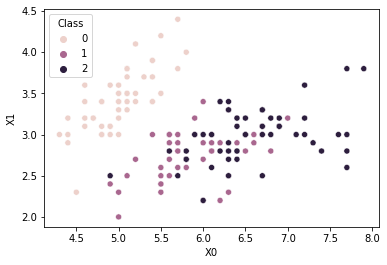

In [233]:
#plot data using last column as color group
if col_count == 3:
    sns.scatterplot(x='X0', y='X1', hue='Class', data=df)
elif col_count == 4:
    #plot scatterplot in 3d
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['X0'], df['X1'], df['X2'], c=df['Class_Enc'], marker='o')
    ax.set_xlabel('X0')
    ax.set_ylabel('X1')
    ax.set_zlabel('X2')
    plt.show()
else:
    print('Cannot plot data with more than 3 dimensions')
    

    

C:\Users\juanj\AppData\Local\Temp\ipykernel_37172\3281742625.py:10: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='X0', y='X1', hue='Class', data=test, palette=['black', 'red'])


<AxesSubplot: xlabel='X0', ylabel='X1'>

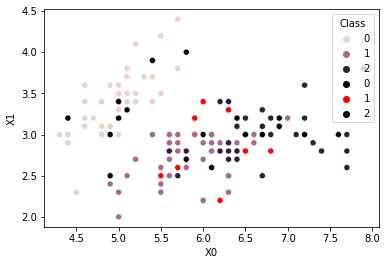

In [234]:
#Take 80% for training and 20% for testing
train = df.sample(frac=0.8, random_state=200)
test = df.drop(train.index)

#plot training data

sns.scatterplot(x='X0', y='X1', hue='Class', data=train)

#plot testing data with different color
sns.scatterplot(x='X0', y='X1', hue='Class', data=test, palette=['black', 'red'])





In [235]:
train
#save to csv
save_path = 'data/train.csv'
train.to_csv(save_path, index=False)

In [236]:
#test
test

test.to_csv('data/test.csv', index=False)

In [237]:
# n dimensional eclidian distance
def distance(x, y):
    return sum([(x[i]-y[i])**2 for i in range(len(x))])**0.5


In [238]:
# distance between n dimensional points
testa = [1.5, 1.5]  
# calculate distance between test point and all points in dataframe
#df['Distance'] = df.apply(lambda row: distance(row[:-2], testa), axis=1)

In [239]:
# sort by distance
#df.sort_values(by=['Distance'])

In [240]:
# get k nearest neighbors
def knn(df_test, df_train, k):
    #for each row in test dataframe
    for index, row in df_test.iterrows():
        #calculate distance between test point and all points in dataframe
        print('Test point: ', row[:-1])
        print("---------------------------")
        df_train['Distance'] = df_train.apply(lambda rowT: distance(rowT[:-1], row[:-1]), axis=1)
        df_train.sort_values(by=['Distance'], inplace=True)
        #sort by distance
        print('Train points: ')
        print(df_train)
        
        #save to csv
        #get k nearest neighbors
        neighbors = df_train.head(k)


        #print('Neighbors: ')
        #print(neighbors)
        #get most common class
        print('-----------------------\n Class: ')
        print(neighbors['Class'].value_counts())
        classi = neighbors['Class'].value_counts().idxmax()
        print(classi)

       
        #add class_pred column to test dataframe
        df_test.loc[index, 'Class_pred'] = str(classi)

        #drop distance column
        df_train.drop(columns=['Distance'], inplace=True)

       # input("Press Enter to continue...")
        
    return df_test


prueba = pandas.DataFrame([[5, 4, 0]], columns=['X0', 'X1', 'Class'])
x_test=knn(test,train, 4)
    


Test point:  X0    4.9
X1    3.0
Name: 1, dtype: float64
---------------------------
Train points: 
      X0   X1  Class  Distance
25   5.0  3.0      0  0.100000
9    4.9  3.1      0  0.100000
34   4.9  3.1      0  0.100000
45   4.8  3.0      0  0.100000
12   4.8  3.0      0  0.100000
..   ...  ...    ...       ...
135  7.7  3.0      2  2.800000
122  7.7  2.8      2  2.807134
118  7.7  2.6      2  2.828427
117  7.7  3.8      2  2.912044
131  7.9  3.8      2  3.104835

[120 rows x 4 columns]
-----------------------
 Class: 
0    4
Name: Class, dtype: int64
0
Test point:  X0    5.0
X1    3.4
Name: 7, dtype: float64
---------------------------
Train points: 
      X0   X1  Class  Distance
39   5.1  3.4      0  0.100000
40   5.0  3.5      0  0.100000
43   5.0  3.5      0  0.100000
49   5.0  3.3      0  0.100000
0    5.1  3.5      0  0.141421
..   ...  ...    ...       ...
117  7.7  3.8      2  2.729469
135  7.7  3.0      2  2.729469
122  7.7  2.8      2  2.765863
118  7.7  2.6      2  2.81

In [241]:
x_test

,X0,X1,Class,Class_pred
1,4.9,3.0,0,0
7,5.0,3.4,0,0
14,5.8,4.0,0,0
16,5.4,3.9,0,0
23,5.1,3.3,0,0
26,5.0,3.4,0,0
35,5.0,3.2,0,0
42,4.4,3.2,0,0
51,6.4,3.2,1,2
54,6.5,2.8,1,2


In [242]:
#calculate accuracy
def accuracy(df):
    #set class_pred to string
    df['Class_pred'] = df['Class_pred'].astype(str)
    #set class to string
    df['Class'] = df['Class'].astype(str)
    print(f"Accuracy: {sum(df['Class'] == df['Class_pred'])}/{len(df)}")
    return sum(df['Class'] == df['Class_pred'])/len(df)
